# **Sounding Out Parkinson's Disease**

# **Original Dataset**

Our model will be trained and tested on tabular data acquired from a study gathering speech features from 188 patients with Parkinson's disease and 64 healthy individuals (Sakar et al., 2018). We accessed the data on [Kaggle](https://www.kaggle.com/datasets/dipayanbiswas/parkinsons-disease-speech-signal-features?resource=download).

Original Dataset from UCI Machine Learning Repository: https://archive.ics.uci.edu/dataset/470/parkinson+s+disease+classification.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dipayanbiswas/parkinsons-disease-speech-signal-features")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/parkinsons-disease-speech-signal-features


In [ ]:
path = "/kaggle/input/parkinsons-disease-speech-signal-features/pd_speech_features.csv"
df = pd.read_csv(path)
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [ ]:
# 756 rows x 755 features!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


# **Feature Engineering**

In this section, we **reduced the dimensionality** of our dataset from 755 features by applying feature selection techniques as follow:

In [ ]:
old_df = df

In [ ]:
def aggregate_by_dtype(df):
    # Separate columns by dtype
    int_cols = df.select_dtypes(include='int64').columns.difference(['id'])
    float_cols = df.select_dtypes(include='float64').columns.difference(['id'])

    # Define aggregation functions
    agg_funcs = {col: 'median' for col in int_cols}
    agg_funcs.update({col: 'mean' for col in float_cols})

    # Always group by ID column
    grouped = df.groupby('id').agg(agg_funcs).reset_index()

    return grouped

new_df = aggregate_by_dtype(df)
new_df

,id,app_entropy_shannon_10_coef,class,gender,numPeriodsPulses,numPulses,DFA,Ea,Ea2,Ed2_10_coef,...,tqwt_stdValue_dec_33,tqwt_stdValue_dec_34,tqwt_stdValue_dec_35,tqwt_stdValue_dec_36,tqwt_stdValue_dec_4,tqwt_stdValue_dec_5,tqwt_stdValue_dec_6,tqwt_stdValue_dec_7,tqwt_stdValue_dec_8,tqwt_stdValue_dec_9
0,0,-3.750669e+09,1.0,1.0,233.0,234.0,0.696370,99.999767,100.000000,0.000003,...,0.003071,0.002966,0.002776,0.003447,0.000275,0.000364,0.000774,0.001708,0.002959,0.003446
1,1,-3.391442e+09,1.0,0.0,221.0,226.0,0.793993,99.098867,99.966900,0.012385,...,0.049146,0.035852,0.032724,0.114533,0.002036,0.002505,0.002316,0.003007,0.005190,0.006843
2,2,-7.285010e+09,1.0,1.0,317.0,318.0,0.619967,99.996000,99.999833,0.000113,...,0.044889,0.035295,0.033641,0.093480,0.005071,0.006321,0.006972,0.012333,0.019822,0.022441
3,3,-1.775563e+10,1.0,0.0,492.0,493.0,0.626097,99.999300,100.000000,0.000007,...,0.003589,0.002737,0.002013,0.002243,0.001113,0.000707,0.001264,0.003469,0.006911,0.009291
4,4,-1.799560e+10,1.0,0.0,304.0,305.0,0.779397,99.998367,99.999967,0.000029,...,0.004567,0.002318,0.001654,0.002437,0.000893,0.000349,0.000287,0.000332,0.000674,0.001298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,247,-7.454641e+09,1.0,0.0,326.0,327.0,0.651830,99.997833,99.999933,0.000025,...,0.003448,0.003390,0.003016,0.004890,0.000387,0.000819,0.001462,0.003355,0.008477,0.013239
248,248,-1.026381e+10,1.0,1.0,346.0,348.0,0.688327,99.975767,99.998467,0.000011,...,0.113594,0.059581,0.060648,0.200613,0.001504,0.001374,0.001918,0.004377,0.008625,0.010280
249,249,-8.146671e+09,1.0,1.0,339.0,340.0,0.788800,99.999400,100.000000,0.000016,...,0.027772,0.021752,0.021261,0.050579,0.003631,0.006937,0.008342,0.007457,0.006143,0.004050
250,250,-1.121576e+10,0.0,0.0,413.0,415.0,0.569010,99.975867,99.998433,0.000260,...,0.025853,0.026830,0.021823,0.030294,0.003312,0.004961,0.011256,0.021722,0.028662,0.028473


In [ ]:
new_df.describe()

,id,app_entropy_shannon_10_coef,class,gender,numPeriodsPulses,numPulses,DFA,Ea,Ea2,Ed2_10_coef,...,tqwt_stdValue_dec_33,tqwt_stdValue_dec_34,tqwt_stdValue_dec_35,tqwt_stdValue_dec_36,tqwt_stdValue_dec_4,tqwt_stdValue_dec_5,tqwt_stdValue_dec_6,tqwt_stdValue_dec_7,tqwt_stdValue_dec_8,tqwt_stdValue_dec_9
count,252.000000,2.520000e+02,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,...,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,125.500000,-9.047211e+09,0.746032,0.515873,324.964286,326.337302,0.700414,99.929173,99.996479,0.001602,...,0.029270,0.024575,0.024333,0.057884,0.003284,0.004179,0.004738,0.006132,0.008977,0.011832
std,72.890329,5.408068e+09,0.436146,0.500743,94.784273,94.699490,0.066284,0.250156,0.010473,0.005547,...,0.054537,0.041915,0.038763,0.083600,0.003568,0.004910,0.005116,0.005587,0.007831,0.009271
min,0.000000,-4.180537e+10,0.000000,0.000000,80.000000,94.000000,0.555967,97.740333,99.922900,0.000002,...,0.000752,0.000373,0.000302,0.000413,0.000007,0.000008,0.000010,0.000024,0.000084,0.000162
25%,62.750000,-1.154438e+10,0.000000,0.000000,256.000000,257.000000,0.651182,99.982150,99.999033,0.000017,...,0.006390,0.004190,0.003845,0.005941,0.000869,0.000974,0.001286,0.001754,0.002654,0.003782
50%,125.500000,-7.929359e+09,1.000000,1.000000,313.500000,314.500000,0.699407,99.997667,99.999917,0.000039,...,0.011999,0.008231,0.007674,0.016214,0.002400,0.002926,0.003253,0.005019,0.007103,0.009546
75%,188.250000,-5.235988e+09,1.000000,1.000000,391.500000,392.500000,0.752511,99.999133,99.999967,0.000250,...,0.031942,0.028076,0.030077,0.084848,0.004487,0.005666,0.006607,0.009086,0.013199,0.018249
max,251.000000,-1.529449e+09,1.000000,1.000000,605.000000,606.000000,0.851113,99.999867,100.000000,0.047854,...,0.534663,0.342340,0.263527,0.447280,0.030232,0.044204,0.053155,0.047772,0.057979,0.041121


In [ ]:
df = new_df

## **1. Drop Constant & Near-constant Features**

Remove columns with <1% variance (pure noise)

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# 1. Split predictors and target
X = df.drop('class', axis=1)   # all 754 acoustic features
y = df['class']                # 0 = healthy, 1 = PD

# 2. Remove features with very low variance (threshold = 0.01  ➜  a feature must change at least 1% across the dataset to survive)
var_thresh = VarianceThreshold(threshold=0.01)
X_var = var_thresh.fit_transform(X)

# Keep the surviving column names
selected_cols_var = X.columns[var_thresh.get_support()]
print(f"Kept {len(selected_cols_var)} / {X.shape[1]} features after variance filter")

Kept 416 / 754 features after variance filter


## **2. Drop Highly Correlated Features**

If |corr| > 0.95 keep only one to cut redundancy

In [ ]:
# Convert the variance-filtered array back to a DataFrame with names
X_var_df = pd.DataFrame(X_var, columns=selected_cols_var)

# 1. Compute absolute correlation matrix
corr_matrix = X_var_df.corr().abs()

# 2. Keep upper triangle (to avoid duplicate pairs)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 3. Find columns with correlation > 0.95
to_drop_corr = [col for col in upper.columns if any(upper[col] > 0.95)]

# 4. Drop them
X_uncorr = X_var_df.drop(columns=to_drop_corr)
print(f"Dropped {len(to_drop_corr)} highly correlated features")

Dropped 177 highly correlated features


## **3. Random Forest Importance**

Keep columns whose importance > 0.005 (captures non-linear interactions)

* A score of 0.005 means that feature explained ≈ 0.5% of the Forest's decision making power

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 1. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_uncorr, y, test_size=0.25, random_state=42, stratify=y)

# 2. Fit Random Forest
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

# 3. Grab feature importances
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X_uncorr.columns)

# 4. Keep features with importance > 0.005
rf_keep = feat_imp[feat_imp > 0.005].index.tolist()
print(f"{len(rf_keep)} features have RF importance > 0.005")

# 5. Reduce dataset to those features
X_rf = X_uncorr[rf_keep]

55 features have RF importance > 0.005


## **4. SelectKBest**

### **🙅 4.1 (Option A) Overlapped Features**

Features that overlap from SelectKBest (without RF filter) and Random Forest

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select the top 50 features purely by ANOVA F-score
k_best_no_rf = SelectKBest(score_func=f_classif, k=50)
X_best_no_rf = k_best_no_rf.fit_transform(X_uncorr, y)

# Column names of those 50 features
selected_cols_kbest_no_rf = X_uncorr.columns[k_best_no_rf.get_support()]

print("Top 50 features selected by ANOVA F-test (no RF filter):")
print(selected_cols_kbest_no_rf.tolist())
print(f"\nFinal feature count after SelectKBest: {X_best_no_rf.shape[1]}")

Top 50 features selected by ANOVA F-test (no RF filter):
['app_entropy_shannon_10_coef', 'numPeriodsPulses', 'IMF_SNR_entropy', 'RPDE', 'VFER_entropy', 'app_LT_TKEO_mean_10_coef', 'app_LT_TKEO_std_1_coef', 'app_TKEO_std_1_coef', 'f1', 'f2', 'maxIntensity', 'meanHarmToNoiseHarmonicity', 'mean_MFCC_2nd_coef', 'mean_MFCC_3rd_coef', 'minIntensity', 'std_MFCC_6th_coef', 'tqwt_entropy_log_dec_10', 'tqwt_entropy_log_dec_11', 'tqwt_entropy_log_dec_12', 'tqwt_entropy_log_dec_18', 'tqwt_entropy_log_dec_26', 'tqwt_entropy_log_dec_27', 'tqwt_entropy_log_dec_34', 'tqwt_entropy_shannon_dec_10', 'tqwt_entropy_shannon_dec_11', 'tqwt_entropy_shannon_dec_12', 'tqwt_entropy_shannon_dec_13', 'tqwt_entropy_shannon_dec_14', 'tqwt_entropy_shannon_dec_15', 'tqwt_entropy_shannon_dec_16', 'tqwt_entropy_shannon_dec_17', 'tqwt_entropy_shannon_dec_18', 'tqwt_entropy_shannon_dec_34', 'tqwt_entropy_shannon_dec_35', 'tqwt_entropy_shannon_dec_7', 'tqwt_entropy_shannon_dec_8', 'tqwt_entropy_shannon_dec_9', 'tqwt_kurtos

In [ ]:
# 1. Convert to sets
rf_features     = set(X_rf.columns)                 # from Random-Forest filter
kbest_features  = set(selected_cols_kbest_no_rf.tolist()) # from SelectKBest

# 2. Compare
overlap     = rf_features & kbest_features          # features kept by both
rf_only     = rf_features - kbest_features          # kept only by Random Forest
kbest_only  = kbest_features - rf_features          # kept only by SelectKBest

# 3. Display summary
print(f"Total RF features:        {len(rf_features)}")
print(f"Total SelectKBest features: {len(kbest_features)}")
print(f"Overlap (both methods):    {len(overlap)}")
print(f"RF-only features:          {len(rf_only)}")
print(f"SelectKBest-only features: {len(kbest_only)}\n")

# Actual names
print("Overlap:\n", sorted(overlap))
print("\nRF-only:\n", sorted(rf_only))
print("\nSelectKBest-only:\n", sorted(kbest_only))

Total RF features:        55
Total SelectKBest features: 50
Overlap (both methods):    34
RF-only features:          21
SelectKBest-only features: 16

Overlap:
 ['RPDE', 'app_LT_TKEO_mean_10_coef', 'app_LT_TKEO_std_1_coef', 'app_entropy_shannon_10_coef', 'mean_MFCC_2nd_coef', 'minIntensity', 'std_MFCC_6th_coef', 'tqwt_entropy_log_dec_10', 'tqwt_entropy_log_dec_11', 'tqwt_entropy_log_dec_12', 'tqwt_entropy_log_dec_18', 'tqwt_entropy_log_dec_26', 'tqwt_entropy_log_dec_27', 'tqwt_entropy_log_dec_34', 'tqwt_entropy_shannon_dec_10', 'tqwt_entropy_shannon_dec_11', 'tqwt_entropy_shannon_dec_12', 'tqwt_entropy_shannon_dec_13', 'tqwt_entropy_shannon_dec_16', 'tqwt_entropy_shannon_dec_17', 'tqwt_entropy_shannon_dec_34', 'tqwt_entropy_shannon_dec_35', 'tqwt_entropy_shannon_dec_7', 'tqwt_entropy_shannon_dec_9', 'tqwt_kurtosisValue_dec_17', 'tqwt_kurtosisValue_dec_18', 'tqwt_kurtosisValue_dec_20', 'tqwt_kurtosisValue_dec_26', 'tqwt_kurtosisValue_dec_27', 'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisV

### **4.2 (Option B) Hierarchical**

Run SelectKBest on the Random Forest selected set

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Keep top 32 features by ANOVA F-score
k_best_with_rf = SelectKBest(score_func=f_classif, k=34)
X_best_with_rf = k_best_with_rf.fit_transform(X_rf, y)

# Column names after SelectKBest
selected_cols_kbest_with_rf = pd.Index(rf_keep)[k_best_with_rf.get_support()]

print("Top 34 features selected by ANOVA F-test (with RF filter):")
print(selected_cols_kbest_with_rf.tolist())
print(f"\nFinal feature count after SelectKBest: {X_best_with_rf.shape[1]}")

Top 34 features selected by ANOVA F-test (with RF filter):
['app_entropy_shannon_10_coef', 'RPDE', 'app_LT_TKEO_mean_10_coef', 'app_LT_TKEO_std_1_coef', 'mean_MFCC_2nd_coef', 'minIntensity', 'std_MFCC_6th_coef', 'tqwt_entropy_log_dec_10', 'tqwt_entropy_log_dec_11', 'tqwt_entropy_log_dec_12', 'tqwt_entropy_log_dec_18', 'tqwt_entropy_log_dec_26', 'tqwt_entropy_log_dec_27', 'tqwt_entropy_log_dec_34', 'tqwt_entropy_shannon_dec_10', 'tqwt_entropy_shannon_dec_11', 'tqwt_entropy_shannon_dec_12', 'tqwt_entropy_shannon_dec_13', 'tqwt_entropy_shannon_dec_16', 'tqwt_entropy_shannon_dec_17', 'tqwt_entropy_shannon_dec_34', 'tqwt_entropy_shannon_dec_35', 'tqwt_entropy_shannon_dec_7', 'tqwt_entropy_shannon_dec_9', 'tqwt_kurtosisValue_dec_17', 'tqwt_kurtosisValue_dec_18', 'tqwt_kurtosisValue_dec_20', 'tqwt_kurtosisValue_dec_26', 'tqwt_kurtosisValue_dec_27', 'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_36', 'tqwt_maxValue_dec_13', 'tqwt_maxValue_dec_14']

Final feat

## **🙅 5. Verification: Overlap  vs  Hierarchical**

In [ ]:
# 1. Convert hierarchical list to set
hierarchical_set = set(selected_cols_kbest_with_rf)

# 2. Compare with the overlap set you already built
same_sets = hierarchical_set == overlap

print("Are the two feature sets identical? ->", same_sets)
print(f"\nSize of overlap set         : {len(overlap)}")
print(f"Size of hierarchical RF→KBest set: {len(hierarchical_set)}")

# 3. If not identical, show differences
if not same_sets:
    print("\nFeatures in hierarchical set but NOT in overlap:")
    print(sorted(hierarchical_set - overlap))

    print("\nFeatures in overlap but NOT in hierarchical set:")
    print(sorted(overlap - hierarchical_set))

Are the two feature sets identical? -> True

Size of overlap set         : 34
Size of hierarchical RF→KBest set: 34


Same 34 features appear in both methods >> the features are robustly important by two independent criteria.

# **New Dataset with Final Features**

In [ ]:
final_feature_cols = selected_cols_kbest_with_rf.tolist()

df_final = df[final_feature_cols + ['class']]

print("Shape of df_selected34 :", df_final.shape, "\n")
df_final.head()

Shape of df_selected34 : (252, 35) 



,app_entropy_shannon_10_coef,RPDE,app_LT_TKEO_mean_10_coef,app_LT_TKEO_std_1_coef,mean_MFCC_2nd_coef,minIntensity,std_MFCC_6th_coef,tqwt_entropy_log_dec_10,tqwt_entropy_log_dec_11,tqwt_entropy_log_dec_12,...,tqwt_kurtosisValue_dec_18,tqwt_kurtosisValue_dec_20,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_36,tqwt_maxValue_dec_13,tqwt_maxValue_dec_14,class
0,-3.750669e+09,0.567250,3148.508933,6.251133,2.868933,66.691702,0.279997,-290772.504333,-235687.572200,-206693.922067,...,2.798900,2.134600,1.591700,1.546500,1.561733,4.021533,22.961700,0.067007,0.103049,1.0
1,-3.391442e+09,0.592453,3197.511633,7.365433,2.909100,75.679080,0.228993,-280970.371867,-252795.149333,-157849.894800,...,3.732167,2.110300,1.881900,7.049367,4.918567,5.490533,4.467233,0.263487,0.586793,1.0
2,-7.285010e+09,0.520563,3569.639133,7.079467,-0.431677,75.115737,0.267697,-231331.062300,-193707.902700,-122947.736367,...,2.136100,2.681367,1.590333,1.581967,41.129400,9.176633,5.552367,0.268093,0.334543,1.0
3,-1.775563e+10,0.537183,4190.195367,8.299133,0.497686,70.894192,0.418957,-254879.704367,-221763.761267,-123307.903567,...,2.252933,1.681700,5.676767,2.382533,1.677633,3.184433,22.773633,0.300557,0.524343,1.0
4,-1.799560e+10,0.726717,4193.202233,8.321400,3.326100,57.435886,0.280103,-323886.131133,-269673.820000,-190794.023267,...,3.129333,2.641633,3.614567,3.881267,4.104600,7.268333,63.766900,0.051761,0.084737,1.0


In [ ]:
df_final.to_csv('parkinsons_final_dataset.csv', index=False)

# **Dropping Codependent Features**

In [ ]:
# ============================================================
#  Drop codependent features + visual diagnostic heat-maps
# ============================================================
import matplotlib.pyplot as plt
import matplotlib as mpl

# ---------- 1. Correlation heat-map on variance-filtered data ----------
def corr_heatmap(df, threshold=0.95, title='Feature correlation heat-map'):
    """Plots correlation matrix, marks cells above |threshold| in red,
    returns the columns to drop."""
    corr = df.corr().abs()

    # upper-triangle mask (plot & drop logic)
    mask = np.triu(np.ones_like(corr, dtype=bool))
    high_corr = (corr > threshold) & ~np.eye(len(corr), dtype=bool)
    to_drop = [col for col in corr.columns if any(high_corr[col])]

    # --- plotting ---
    plt.figure(figsize=(10, 8))
    cmap = mpl.cm.Reds
    cmap.set_under('white')          # low corr → white
    im = plt.imshow(corr, cmap=cmap, vmin=threshold, vmax=1)
    plt.colorbar(im, fraction=0.046, pad=0.04, label='|ρ|')
    plt.title(title + f'\n(red cells: |ρ| > {threshold})', fontsize=14)
    plt.xticks(range(len(corr)), corr.columns, rotation=90, fontsize=6)
    plt.yticks(range(len(corr)), corr.columns, fontsize=6)
    plt.tight_layout()
    plt.show()

    print(f'{len(to_drop)} features exceed |ρ|>{threshold} and will be dropped.')
    return to_drop

# Call on the variance-filtered DataFrame -----------------------------
to_drop_corr = corr_heatmap(X_var_df, threshold=0.95)
X_uncorr = X_var_df.drop(columns=to_drop_corr)

# ---------- 2. Heat-map of RF vs KBest overlap -----------------------
def overlap_heatmap(rf_set, kbest_set, title='Overlap of feature-selection filters'):
    """Binary matrix: rows = features, cols = filters."""
    all_feats = sorted(rf_set | kbest_set)
    data = np.zeros((len(all_feats), 2), dtype=int)
    for i, f in enumerate(all_feats):
        data[i, 0] = int(f in rf_set)
        data[i, 1] = int(f in kbest_set)

    plt.figure(figsize=(4, 0.25*len(all_feats)))  # auto-height
    plt.imshow(data, cmap=mpl.cm.Reds, vmin=0, vmax=1)
    plt.xticks([0, 1], ['Random\nForest', 'Select\nKBest'], fontsize=10)
    plt.yticks(range(len(all_feats)), all_feats, fontsize=6)
    plt.title(title + '\n(red = selected)', fontsize=12)
    plt.tight_layout()
    plt.show()

# Build the sets you already created -------------------------------
rf_set     = set(X_rf.columns)
kbest_set  = set(selected_cols_kbest_no_rf)       # OR selected_cols_kbest_with_rf
overlap_heatmap(rf_set, kbest_set)

KeyboardInterrupt: 

# **Doing Heatmap and Codependency Check on 34 SelectKBest Features**

Initial 34-feature shape : (252, 35)


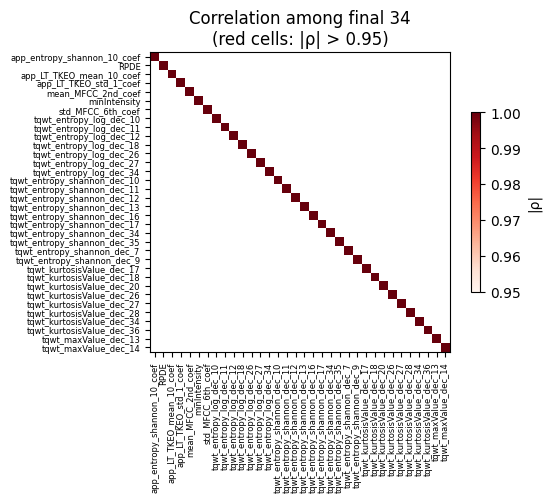

0 features exceed |ρ|>0.95 and will be dropped.
Shape after de-correlation : (252, 35)

=== Logistic Regression ===
Accuracy : 0.7142857142857143
ROC-AUC  : 0.7553191489361701
              precision    recall  f1-score   support

         0.0      0.450     0.562     0.500        16
         1.0      0.837     0.766     0.800        47

    accuracy                          0.714        63
   macro avg      0.644     0.664     0.650        63
weighted avg      0.739     0.714     0.724        63


=== Random Forest ===
Accuracy : 0.7301587301587301
ROC-AUC  : 0.7333776595744681
              precision    recall  f1-score   support

         0.0      0.455     0.312     0.370        16
         1.0      0.788     0.872     0.828        47

    accuracy                          0.730        63
   macro avg      0.622     0.592     0.599        63
weighted avg      0.704     0.730     0.712        63



In [ ]:
# ------------------------------------------------------------
#  A)  Build 34-feature DataFrame
# ------------------------------------------------------------
# Assumes you already ran the earlier notebook and still have
# `df`,  `selected_cols_kbest_with_rf` in memory.
final_34 = selected_cols_kbest_with_rf.tolist()
df_34 = df[final_34 + ['class']]

print("Initial 34-feature shape :", df_34.shape)

# ------------------------------------------------------------
#  B)  Re-use the SAME corr_heatmap to drop codependent feats
# ------------------------------------------------------------
def corr_heatmap(df_in, threshold=0.95, title='Feature correlation heat-map'):
    import matplotlib.pyplot as plt, matplotlib as mpl, numpy as np, pandas as pd
    corr = df_in.corr().abs()
    upper = corr.where(np.triu(np.ones_like(corr, dtype=bool), k=1))
    to_drop = [c for c in upper.columns if any(upper[c] > threshold)]

    # quick plot (optional – comment out if running headless)
    plt.figure(figsize=(6,5))
    cmap = mpl.cm.Reds
    cmap.set_under('white')
    im = plt.imshow(corr, cmap=cmap, vmin=threshold, vmax=1)
    plt.colorbar(im, shrink=.6, label='|ρ|')
    plt.title(f'{title}\n(red cells: |ρ| > {threshold})')
    plt.xticks(range(len(corr)), corr.columns, rotation=90, fontsize=6)
    plt.yticks(range(len(corr)), corr.columns, fontsize=6)
    plt.tight_layout(); plt.show()

    print(f'{len(to_drop)} features exceed |ρ|>{threshold} and will be dropped.')
    return to_drop

# --- apply to the 34 features ---
to_drop_34 = corr_heatmap(df_34.drop('class', axis=1), threshold=0.95,
                           title='Correlation among final 34')
df_34_uncorr = df_34.drop(columns=to_drop_34)
print("Shape after de-correlation :", df_34_uncorr.shape)

# ------------------------------------------------------------
#  C)  Train / Test split & models
# ------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

X_final = df_34_uncorr.drop('class', axis=1)
y_final = df_34_uncorr['class']

X_tr, X_te, y_tr, y_te = train_test_split(
    X_final, y_final, test_size=0.25, random_state=42, stratify=y_final)

# --- Logistic Regression (scaled) ---
logit = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(solver="lbfgs", max_iter=100, class_weight="balanced"))
])
logit.fit(X_tr, y_tr)
prob_log = logit.predict_proba(X_te)[:,1]
pred_log = logit.predict(X_te)

print("\n=== Logistic Regression ===")
print("Accuracy :", accuracy_score(y_te, pred_log))
print("ROC-AUC  :", roc_auc_score(y_te, prob_log))
print(classification_report(y_te, pred_log, digits=3))

# --- Random Forest ---
rf = RandomForestClassifier(
        n_estimators=500, random_state=42, class_weight="balanced")
rf.fit(X_tr, y_tr)
prob_rf = rf.predict_proba(X_te)[:,1]
pred_rf = rf.predict(X_te)

print("\n=== Random Forest ===")
print("Accuracy :", accuracy_score(y_te, pred_rf))
print("ROC-AUC  :", roc_auc_score(y_te, prob_rf))
print(classification_report(y_te, pred_rf, digits=3))

# **Synthetic Data Generation**

Correcting the PD : Non-PD class imbalance, which has a 3:1 ratio

Non-oversampled version

In [ ]:
# import SMOTE module from imblearn library
from collections import Counter
from imblearn.over_sampling import SMOTE

X_final = df_34_uncorr.drop('class', axis=1)
y_final = df_34_uncorr['class']

# Step 1: Split before oversampling
X_tr, X_te, y_tr, y_te, gender_tr, gender_te = train_test_split(
    X_final, y_final, df['gender'],
    test_size=0.25, random_state=42, stratify=y_final
)

print('Original training dataset shape %s' % Counter(y_tr))

Original training dataset shape Counter({1.0: 141, 0.0: 48})


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
import math


# --- Logistic Regression (scaled) ---
logit = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000, class_weight="balanced"))
])
logit.fit(X_tr, y_tr)
prob_log = logit.predict_proba(X_te)[:,1]
pred_log = logit.predict(X_te)

print("\n=== Logistic Regression ===")
print("Accuracy :", accuracy_score(y_te, pred_log))
print("ROC-AUC  :", roc_auc_score(y_te, prob_log))
print(confusion_matrix(y_te, pred_log))
print(classification_report(y_te, pred_log, digits=3))
print("Mean Squared Error :", mean_squared_error(y_te, pred_log))
print("Root Squared Error :", math.sqrt(mean_squared_error(y_te, pred_log)))

# --- Random Forest ---
rf = RandomForestClassifier(
        n_estimators=500, random_state=42, class_weight="balanced")
rf.fit(X_tr, y_tr)
prob_rf = rf.predict_proba(X_te)[:,1]
pred_rf = rf.predict(X_te)

print("\n=== Random Forest ===")
print("Accuracy :", accuracy_score(y_te, pred_rf))
print("ROC-AUC  :", roc_auc_score(y_te, prob_rf))
print(confusion_matrix(y_te, pred_rf))
print(classification_report(y_te, pred_rf, digits=3))
print("Mean Squared Error :", mean_squared_error(y_te, pred_log))
print("Root Squared Error :", math.sqrt(mean_squared_error(y_te, pred_log)))


=== Logistic Regression ===
Accuracy : 0.7142857142857143
ROC-AUC  : 0.7553191489361701
[[ 9  7]
 [11 36]]
              precision    recall  f1-score   support

         0.0      0.450     0.562     0.500        16
         1.0      0.837     0.766     0.800        47

    accuracy                          0.714        63
   macro avg      0.644     0.664     0.650        63
weighted avg      0.739     0.714     0.724        63

Mean Squared Error : 0.2857142857142857
Root Squared Error : 0.5345224838248488

=== Random Forest ===
Accuracy : 0.7301587301587301
ROC-AUC  : 0.7333776595744681
[[ 5 11]
 [ 6 41]]
              precision    recall  f1-score   support

         0.0      0.455     0.312     0.370        16
         1.0      0.788     0.872     0.828        47

    accuracy                          0.730        63
   macro avg      0.622     0.592     0.599        63
weighted avg      0.704     0.730     0.712        63

Mean Squared Error : 0.2857142857142857
Root Squared Err

## SMOTE Oversampling for class imbalance

Correct class imbalance!

In [ ]:
# import SMOTE module from imblearn library
from collections import Counter
from imblearn.over_sampling import SMOTE

X_final = df_34_uncorr.drop('class', axis=1)
y_final = df_34_uncorr['class']

# Step 1: Split before oversampling
X_tr, X_te, y_tr, y_te, gender_tr, gender_te = train_test_split(
    X_final, y_final, df['gender'],
    test_size=0.25, random_state=42, stratify=y_final
)

print('Original training dataset shape %s' % Counter(y_tr))

# Step 2: SMOTE Oversampling on the training dataset

sm = SMOTE(sampling_strategy=0.5, random_state = 42)
X_tr_smote, y_tr_smote = sm.fit_resample(X_tr, y_tr)

print('Resampled dataset shape %s' % Counter(y_tr_smote))

Original training dataset shape Counter({1.0: 141, 0.0: 48})
Resampled dataset shape Counter({1.0: 141, 0.0: 70})


Run Logistic Regression & Random Forest again

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
import math


# --- Logistic Regression (scaled) ---
logit = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000, class_weight="balanced"))
])
logit.fit(X_tr_smote, y_tr_smote)
prob_log = logit.predict_proba(X_te)[:,1]
pred_log = logit.predict(X_te)

print("\n=== Logistic Regression ===")
print("Accuracy :", accuracy_score(y_te, pred_log))
print("ROC-AUC  :", roc_auc_score(y_te, prob_log))
print(confusion_matrix(y_te, pred_log))
print(classification_report(y_te, pred_log, digits=3))
print("Mean Squared Error :", mean_squared_error(y_te, pred_log))
print("Root Squared Error :", math.sqrt(mean_squared_error(y_te, pred_log)))

# --- Random Forest ---
rf = RandomForestClassifier(
        n_estimators=500, random_state=42, class_weight="balanced")
rf.fit(X_tr_smote, y_tr_smote)
prob_rf = rf.predict_proba(X_te)[:,1]
pred_rf = rf.predict(X_te)

print("\n=== Random Forest ===")
print("Accuracy :", accuracy_score(y_te, pred_rf))
print("ROC-AUC  :", roc_auc_score(y_te, prob_rf))
print(confusion_matrix(y_te, pred_rf))
print(classification_report(y_te, pred_rf, digits=3))
print("Mean Squared Error :", mean_squared_error(y_te, pred_log))
print("Root Squared Error :", math.sqrt(mean_squared_error(y_te, pred_log)))


=== Logistic Regression ===
Accuracy : 0.7301587301587301
ROC-AUC  : 0.7646276595744681
[[ 9  7]
 [10 37]]
              precision    recall  f1-score   support

         0.0      0.474     0.562     0.514        16
         1.0      0.841     0.787     0.813        47

    accuracy                          0.730        63
   macro avg      0.657     0.675     0.664        63
weighted avg      0.748     0.730     0.737        63

Mean Squared Error : 0.2698412698412698
Root Squared Error : 0.5194624816493197

=== Random Forest ===
Accuracy : 0.746031746031746
ROC-AUC  : 0.7214095744680852
[[ 7  9]
 [ 7 40]]
              precision    recall  f1-score   support

         0.0      0.500     0.438     0.467        16
         1.0      0.816     0.851     0.833        47

    accuracy                          0.746        63
   macro avg      0.658     0.644     0.650        63
weighted avg      0.736     0.746     0.740        63

Mean Squared Error : 0.2698412698412698
Root Squared Erro

In [ ]:
df

,id,app_entropy_shannon_10_coef,class,gender,numPeriodsPulses,numPulses,DFA,Ea,Ea2,Ed2_10_coef,...,tqwt_stdValue_dec_33,tqwt_stdValue_dec_34,tqwt_stdValue_dec_35,tqwt_stdValue_dec_36,tqwt_stdValue_dec_4,tqwt_stdValue_dec_5,tqwt_stdValue_dec_6,tqwt_stdValue_dec_7,tqwt_stdValue_dec_8,tqwt_stdValue_dec_9
0,0,-3.750669e+09,1.0,1.0,233.0,234.0,0.696370,99.999767,100.000000,0.000003,...,0.003071,0.002966,0.002776,0.003447,0.000275,0.000364,0.000774,0.001708,0.002959,0.003446
1,1,-3.391442e+09,1.0,0.0,221.0,226.0,0.793993,99.098867,99.966900,0.012385,...,0.049146,0.035852,0.032724,0.114533,0.002036,0.002505,0.002316,0.003007,0.005190,0.006843
2,2,-7.285010e+09,1.0,1.0,317.0,318.0,0.619967,99.996000,99.999833,0.000113,...,0.044889,0.035295,0.033641,0.093480,0.005071,0.006321,0.006972,0.012333,0.019822,0.022441
3,3,-1.775563e+10,1.0,0.0,492.0,493.0,0.626097,99.999300,100.000000,0.000007,...,0.003589,0.002737,0.002013,0.002243,0.001113,0.000707,0.001264,0.003469,0.006911,0.009291
4,4,-1.799560e+10,1.0,0.0,304.0,305.0,0.779397,99.998367,99.999967,0.000029,...,0.004567,0.002318,0.001654,0.002437,0.000893,0.000349,0.000287,0.000332,0.000674,0.001298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,247,-7.454641e+09,1.0,0.0,326.0,327.0,0.651830,99.997833,99.999933,0.000025,...,0.003448,0.003390,0.003016,0.004890,0.000387,0.000819,0.001462,0.003355,0.008477,0.013239
248,248,-1.026381e+10,1.0,1.0,346.0,348.0,0.688327,99.975767,99.998467,0.000011,...,0.113594,0.059581,0.060648,0.200613,0.001504,0.001374,0.001918,0.004377,0.008625,0.010280
249,249,-8.146671e+09,1.0,1.0,339.0,340.0,0.788800,99.999400,100.000000,0.000016,...,0.027772,0.021752,0.021261,0.050579,0.003631,0.006937,0.008342,0.007457,0.006143,0.004050
250,250,-1.121576e+10,0.0,0.0,413.0,415.0,0.569010,99.975867,99.998433,0.000260,...,0.025853,0.026830,0.021823,0.030294,0.003312,0.004961,0.011256,0.021722,0.028662,0.028473


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

y_pred = rf.predict(X_te)
y_prob = rf.predict_proba(X_te)[:, 1]  # if using ROC-AUC


print('Gender testing dataset shape %s' % Counter(gender_te))

Gender testing dataset shape Counter({0.0: 39, 1.0: 24})


In [ ]:
for g in np.unique(gender_te):
    mask = gender_te == g
    acc = accuracy_score(y_te[mask], y_pred[mask])
    f1 = f1_score(y_te[mask], y_pred[mask])
    auc = roc_auc_score(y_te[mask], y_prob[mask])

    print(f"Gender: {g} — Accuracy: {acc:.3f}, F1: {f1:.3f}, AUC: {auc:.3f}")


Gender: 0.0 — Accuracy: 0.692, F1: 0.769, AUC: 0.724
Gender: 1.0 — Accuracy: 0.833, F1: 0.909, AUC: 0.519


In [ ]:
from fairlearn.metrics import MetricFrame, selection_rate
from sklearn.metrics import accuracy_score

# Create a MetricFrame
mf = MetricFrame(metrics={"accuracy": accuracy_score, "selection_rate": selection_rate},
                 y_true=y_te,
                 y_pred=y_pred,
                 sensitive_features=gender_te)

print(mf.by_group)           # Metrics per gender
print("\nMax difference between groups: \n", mf.difference())       # Max difference between groups

        accuracy  selection_rate
gender                          
0.0     0.692308        0.641026
1.0     0.833333        1.000000

Max difference between groups: 
 accuracy          0.141026
selection_rate    0.358974
dtype: float64


## ADASYN Oversampling for class imbalance

ADASYN Oversampling

In [ ]:
# import ADASYN module from imblearn library
from collections import Counter
from imblearn.over_sampling import ADASYN

X_final = df_34_uncorr.drop('class', axis=1)
y_final = df_34_uncorr['class']

# Step 1: Split before oversampling
X_tr, X_te, y_tr, y_te, gender_tr, gender_te = train_test_split(
    X_final, y_final, df['gender'],
    test_size=0.25, random_state=42, stratify=y_final
)

print('Original training dataset shape %s' % Counter(y_tr))

# Step 2: ADASYN Oversampling on the training dataset

ada = ADASYN(random_state = 42)
X_tr_ada, y_tr_ada = ada.fit_resample(X_tr, y_tr)

print('Resampled dataset shape %s' % Counter(y_tr_ada))

Original training dataset shape Counter({1.0: 141, 0.0: 48})
Resampled dataset shape Counter({1.0: 141, 0.0: 141})


Run Logistic Regression again

In [ ]:
# --- Logistic Regression (scaled) ---
logit = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000, class_weight="balanced"))
])
logit.fit(X_tr_ada, y_tr_ada)
prob_log = logit.predict_proba(X_te)[:,1]
pred_log = logit.predict(X_te)

print("\n=== Logistic Regression ===")
print("Accuracy :", accuracy_score(y_te, pred_log))
print("ROC-AUC  :", roc_auc_score(y_te, prob_log))
print(confusion_matrix(y_te, pred_log))
print(classification_report(y_te, pred_log, digits=3))

print("Mean Squared Error :", mean_squared_error(y_te, pred_log))
print("Root Squared Error :", math.sqrt(mean_squared_error(y_te, pred_log)))


=== Logistic Regression ===
Accuracy : 0.7619047619047619
ROC-AUC  : 0.7805851063829787
[[ 9  7]
 [ 8 39]]
              precision    recall  f1-score   support

         0.0      0.529     0.562     0.545        16
         1.0      0.848     0.830     0.839        47

    accuracy                          0.762        63
   macro avg      0.689     0.696     0.692        63
weighted avg      0.767     0.762     0.764        63

Mean Squared Error : 0.23809523809523808
Root Squared Error : 0.4879500364742666


Run Random Forest Again

In [ ]:
# --- Random Forest ---
rf = RandomForestClassifier(
        n_estimators=500, random_state=42, class_weight="balanced")
rf.fit(X_tr, y_tr)
prob_rf = rf.predict_proba(X_te)[:,1]
pred_rf = rf.predict(X_te)

print("\n=== Random Forest ===")
print("Accuracy :", accuracy_score(y_te, pred_rf))
print("ROC-AUC  :", roc_auc_score(y_te, prob_rf))
print(confusion_matrix(y_te, pred_rf))
print(classification_report(y_te, pred_rf, digits=3))

print("Mean Squared Error :", mean_squared_error(y_te, pred_rf))
print("Root Squared Error :", math.sqrt(mean_squared_error(y_te, pred_rf)))


=== Random Forest ===
Accuracy : 0.7301587301587301
ROC-AUC  : 0.7333776595744681
[[ 5 11]
 [ 6 41]]
              precision    recall  f1-score   support

         0.0      0.455     0.312     0.370        16
         1.0      0.788     0.872     0.828        47

    accuracy                          0.730        63
   macro avg      0.622     0.592     0.599        63
weighted avg      0.704     0.730     0.712        63

Mean Squared Error : 0.2698412698412698
Root Squared Error : 0.5194624816493197


In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

pipe = Pipeline([
    ("smote", SMOTE(random_state=42)),
    ("rf",    RandomForestClassifier(random_state=42, class_weight="balanced"))
])

param_grid = {
    "rf__n_estimators": [300, 500, 800],
    "rf__max_depth":    [None, 10, 20],
    "rf__min_samples_leaf": [1, 3, 5]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    pipe,
    param_grid,
    scoring="roc_auc",        # <-- simplest fix
    cv=cv,
    n_jobs=-1,
    verbose=2,
    error_score="raise"
)

grid.fit(X_final, y_final)
print("Best ROC-AUC :", grid.best_score_)
print("Best params  :", grid.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


KeyboardInterrupt: 

# **Model Training**

## **Supervised Learning Workflow (34 Features, SMOTE, RF Classifier)**

need to figure out how to actually make it oversample

In [ ]:
# ------------------------------------------------------------------
# 🔄  START HERE – work from the saved 34-feature CSV on disk
# ------------------------------------------------------------------
import pandas as pd
import numpy as np

from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.pipeline import Pipeline

# Load data
df_clean = pd.read_csv('parkinsons_final_dataset.csv')
X = df_clean.drop('class', axis=1)
y = df_clean['class']

# Custom transformer to drop highly correlated features
class CorrelationFilter(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.95):
        self.threshold = threshold
    def fit(self, X, y=None):
        df = pd.DataFrame(X, columns=getattr(X, "columns", None))
        corr = df.corr().abs()
        upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
        self.to_drop_ = [col for col in upper.columns if any(upper[col] > self.threshold)]
        return self
    def transform(self, X):
        df = pd.DataFrame(X, columns=getattr(X, "columns", None))
        return df.drop(columns=self.to_drop_, errors="ignore").values

# Step 1: Split before oversampling
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.25, stratify=y, random_state=123)

# Step 2: Build pipeline with oversampling inside
pipe = Pipeline(steps=[
    ('var', VarianceThreshold(0.01)),
    ('corr', CorrelationFilter(threshold=0.95)),
    ('kbest', SelectKBest(f_classif, k=34)),
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# Step 3: Tune only RF parameters
param_grid = {
    "rf__n_estimators": [300, 500, 800],
    "rf__max_depth": [None, 10, 20],
    "rf__min_samples_leaf": [1, 3, 5]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Step 4: Grid search with balanced training data
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1,
    verbose=2,
    error_score="raise"
)

# Fit the full pipeline on training data
grid.fit(X_tr, y_tr)

# Evaluate on test set (unseen, imbalanced)
y_pred = grid.predict(X_te)
y_prob = grid.predict_proba(X_te)[:, 1]

# Print results
print("\nBest CV ROC-AUC :", grid.best_score_)
print("Best params     :", grid.best_params_)

print("\n=== Test-set performance (best pipeline) ===")
print("Accuracy :", accuracy_score(y_te, y_pred))
print("ROC-AUC  :", roc_auc_score(y_te, y_prob))
print(classification_report(y_te, y_pred, digits=3))

Fitting 5 folds for each of 27 candidates, totalling 135 fits


KeyboardInterrupt: 

## **Supervised Learning Workflow (34 Features, ADASYN, RF Classifier)**

figure out how to actually make it oversample

In [ ]:
# ------------------------------------------------------------------
# 🔄  START HERE – work from the saved 34-feature CSV on disk
# ------------------------------------------------------------------
import pandas as pd
import numpy as np

# 1️⃣  Load the cleaned 34-feature dataset you just wrote to disk
df_clean = pd.read_csv('parkinsons_final_dataset.csv')
print("Loaded shape :", df_clean.shape)           # should be (755, 34)

# 2️⃣  Split predictors / target ------------------------------
X = df_clean.drop('class', axis=1)
y = df_clean['class']

# 3️⃣  End-to-end pipeline  (variance → de-corr → KBest → ADASYN → RF)
from imblearn.pipeline       import Pipeline
from imblearn.over_sampling  import ADASYN
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.ensemble        import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.metrics         import classification_report, roc_auc_score, accuracy_score
from sklearn.base            import BaseEstimator, TransformerMixin

# ── custom transformer to drop highly correlated columns ───────────
class CorrelationFilter(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.95):
        self.threshold = threshold
    def fit(self, X, y=None):
        df = pd.DataFrame(X, columns=getattr(X, "columns", None))
        corr  = df.corr().abs()
        upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
        self.to_drop_ = [col for col in upper.columns if any(upper[col] > self.threshold)]
        return self
    def transform(self, X):
        df = pd.DataFrame(X, columns=getattr(X, "columns", None))
        return df.drop(columns=self.to_drop_, errors="ignore").values

# ── pipeline definition ────────────────────────────────────────────
base_pipe = Pipeline(steps=[
        ('var',   VarianceThreshold(0.01)),          # remove near-zero variance features
        ('corr',  CorrelationFilter(threshold=0.95)),# remove highly correlated features
        ('kbest', SelectKBest(f_classif, k=34)),     # retain top 34 features (already known)
        ('adasyn', ADASYN(random_state=42)),         # apply ADASYN oversampling
        ('rf',    RandomForestClassifier(class_weight='balanced', random_state=42))
])

# parameter grid for the RF step
param_grid = {
    "rf__n_estimators":     [300, 500, 800],
    "rf__max_depth":        [None, 10, 20],
    "rf__min_samples_leaf": [1, 3, 5]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
        estimator = base_pipe,
        param_grid = param_grid,
        scoring    = "roc_auc",
        cv         = cv,
        n_jobs     = -1,
        verbose    = 2,
        error_score= "raise"
)

# 4️⃣  Train / evaluate on a hold-out test set -----------------------
X_tr, X_te, y_tr, y_te = train_test_split(
        X, y, test_size=0.25, stratify=y, random_state=123)

grid.fit(X_tr, y_tr)

print("\nBest CV ROC-AUC :", grid.best_score_)
print("Best params     :", grid.best_params_)

# ── final evaluation on test split ─────────────────────────────────
y_pred  = grid.predict(X_te)
y_prob  = grid.predict_proba(X_te)[:,1]

print("\n=== Test-set performance (best pipeline) ===")
print("Accuracy :", accuracy_score(y_te, y_pred))
print("ROC-AUC  :", roc_auc_score(y_te, y_prob))
print(classification_report(y_te, y_pred, digits=3))

## **K-Nearest Neighbors**

scale using SMOTE oversampled X & y

train & test KNN model

In [ ]:
X_final = df_34_uncorr.drop('class', axis=1)
y_final = df_34_uncorr['class']

# Step 1: Split before oversampling
X_tr, X_te, y_tr, y_te = train_test_split(
    X_final, y_final,
    test_size=0.25, random_state=42, stratify=y_final
)

print('Original training dataset shape %s' % Counter(y_tr))

# Step 2: SMOTE Oversampling on the training dataset

sm = SMOTE(random_state = 42)
X_tr_smote, y_tr_smote = sm.fit_resample(X_tr, y_tr)

print('Resampled dataset shape %s' % Counter(y_tr_smote))

Original training dataset shape Counter({1.0: 141, 0.0: 48})
Resampled dataset shape Counter({1.0: 141, 0.0: 141})


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_final = df_34_uncorr.drop('class', axis=1)
y_final = df_34_uncorr['class']

X_tr, X_te, y_tr, y_te = train_test_split(
    X_final, y_final,
    test_size=0.25, random_state=42, stratify=y_final
)

# --- pipeline (scaled) ---
knn = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", KNeighborsClassifier(n_neighbors=3))
])

knn.fit(X_tr, y_tr)
prob_log = logit.predict_proba(X_te)[:,1]
pred_log = logit.predict(X_te)

# Predict and evaluate
pred_knn = knn.predict(X_te)
prob_knn = knn.predict_proba(X_te)[:,1]

print("\n=== KNN ===")
print("Accuracy :", accuracy_score(y_te, pred_knn))
print("ROC-AUC  :", roc_auc_score(y_te, prob_knn))
print(confusion_matrix(y_te, pred_knn))
print(classification_report(y_te, pred_knn, digits=2))

print("Mean Squared Error :", mean_squared_error(y_te, pred_knn))
print("Root Squared Error :", math.sqrt(mean_squared_error(y_te, pred_knn)))


=== KNN ===
Accuracy : 0.7936507936507936
ROC-AUC  : 0.7333776595744681
[[ 8  8]
 [ 5 42]]
              precision    recall  f1-score   support

         0.0       0.62      0.50      0.55        16
         1.0       0.84      0.89      0.87        47

    accuracy                           0.79        63
   macro avg       0.73      0.70      0.71        63
weighted avg       0.78      0.79      0.79        63

Mean Squared Error : 0.20634920634920634
Root Squared Error : 0.45425676257949793


In [ ]:
from sklearn.model_selection import cross_val_score

# Range of k values to try
k_range = range(1, 21)
cv_scores = []

# Evaluate each k using 5-fold cross-validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y_smote, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plot accuracy vs. k
plt.figure(figsize=(8, 5))
plt.plot(k_range, cv_scores, marker='o')
plt.title("k-NN Cross-Validation Accuracy vs k")
plt.xlabel("Number of Neighbors: k")
plt.ylabel("Cross-Validated Accuracy")
plt.grid(True)
plt.show()

# Best k
best_k = k_range[np.argmax(cv_scores)]
print(f"Best k from cross-validation: {best_k}")

### K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(random_state=42)

# Get accuracy scores across 5 folds
scores = cross_val_score(rf, X_scaled, y_ada, cv=10, scoring='accuracy')

print("CV Accuracy scores:", scores)
print("Mean CV Accuracy:", scores.mean())

## Nonlinear SVM with Gaussian RBF Kernel

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('01')
    plt.xlabel('01')

In [ ]:
def plot_roc_curve(y_test, y_pred):
    # calculate the fpr and tpr for all thresholds of the classification
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.figure(figsize=(8, 6))

    # method I: plt
    plt.title('Receiver Operating Characteristic', fontsize=14)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right', fontsize=11)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.005, 1])
    plt.ylim([0, 1.005])
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.grid(color='r', linestyle='--', linewidth=0.2)
    plt.show()

In [ ]:
from sklearn.svm import SVC

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_smote)

# Split into train and test
X_tr, X_te, y_tr, y_te = train_test_split(
    X_scaled, y_smote, test_size=0.25, random_state=42, stratify=y_smote
)

svm_clf = SVC(kernel='rbf', gamma='scale', C=1, probability=True)
svm_clf.fit(X_tr, y_tr)

pred_svm = svm_clf.predict(X_te)
prob_svm = svm_clf.predict_proba(X_te)[:,1]

print("\n=== SVC  ===")
print("Accuracy :", accuracy_score(y_te, pred_svm))
print("ROC-AUC  :", roc_auc_score(y_te, prob_svm))
print(confusion_matrix(y_te, pred_svm))
print(classification_report(y_te, pred_svm, digits=2))

print("Mean Squared Error :", mean_squared_error(y_te, pred_svm))

## XGBoost

using SMOTE

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Split into train and test
X_tr, X_te, y_tr, y_te = train_test_split(
    X_smote, y_smote, test_size=0.25, random_state=42, stratify=y_smote
)

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_tr, y_tr)
pred_xgb = xgb_model.predict(X_te)
prob_xgb = xgb_model.predict_proba(X_te)[:,1]

print("\n=== XGBoost  ===")
print("Accuracy :", accuracy_score(y_te, pred_xgb))
print("ROC-AUC  :", roc_auc_score(y_te, prob_xgb))
print(confusion_matrix(y_te, pred_xgb))
print(classification_report(y_te, pred_xgb, digits=2))

print("Mean Squared Error :", mean_squared_error(y_te, pred_xgb))


=== XGBoost  ===
Accuracy : 0.8404255319148937
ROC-AUC  : 0.9280217292892712
[[43  4]
 [11 36]]
              precision    recall  f1-score   support

         0.0       0.80      0.91      0.85        47
         1.0       0.90      0.77      0.83        47

    accuracy                           0.84        94
   macro avg       0.85      0.84      0.84        94
weighted avg       0.85      0.84      0.84        94

Mean Squared Error : 0.1595744680851064


try XGBoost with SMOTE, and n_estimators=300, max_depth=4, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, scale_pos_weight=1, random_state=42, eval_metric='logloss', objective='binary:logistic'

In [ ]:
# Split into train and test
X_tr, X_te, y_tr, y_te = train_test_split(
    X_smote, y_smote, test_size=0.25, random_state=42, stratify=y_smote
)

xgb_model = xgb.XGBClassifier(
    n_estimators=300, max_depth=4, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, scale_pos_weight=1, random_state=42, eval_metric='logloss', objective='binary:logistic'
)

xgb_model.fit(X_tr, y_tr)
pred_xgb = xgb_model.predict(X_te)
prob_xgb = xgb_model.predict_proba(X_te)[:,1]

print("\n=== XGBoost  ===")
print("Accuracy :", accuracy_score(y_te, pred_xgb))
print("ROC-AUC  :", roc_auc_score(y_te, prob_xgb))
print(confusion_matrix(y_te, pred_xgb))
print(classification_report(y_te, pred_xgb, digits=2))

print("Mean Squared Error :", mean_squared_error(y_te, pred_xgb))


=== XGBoost  ===
Accuracy : 0.8723404255319149
ROC-AUC  : 0.9379809868718878
[[45  2]
 [10 37]]
              precision    recall  f1-score   support

         0.0       0.82      0.96      0.88        47
         1.0       0.95      0.79      0.86        47

    accuracy                           0.87        94
   macro avg       0.88      0.87      0.87        94
weighted avg       0.88      0.87      0.87        94

Mean Squared Error : 0.1276595744680851


using ADASYN

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Split into train and test
X_tr, X_te, y_tr, y_te = train_test_split(
    X_ada, y_ada, test_size=0.25, random_state=42, stratify=y_ada
)

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_tr, y_tr)
pred_xgb = xgb_model.predict(X_te)
prob_xgb = xgb_model.predict_proba(X_te)[:,1]

print("\n=== XGBoost  ===")
print("Accuracy :", accuracy_score(y_te, pred_xgb))
print("ROC-AUC  :", roc_auc_score(y_te, prob_xgb))
print(confusion_matrix(y_te, pred_xgb))
print(classification_report(y_te, pred_xgb, digits=2))

print("Mean Squared Error :", mean_squared_error(y_te, pred_xgb))


=== XGBoost  ===
Accuracy : 0.8387096774193549
ROC-AUC  : 0.9352451433857538
[[43  3]
 [12 35]]
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85        46
         1.0       0.92      0.74      0.82        47

    accuracy                           0.84        93
   macro avg       0.85      0.84      0.84        93
weighted avg       0.85      0.84      0.84        93

Mean Squared Error : 0.16129032258064516


In [ ]:
# Split into train and test
X_tr, X_te, y_tr, y_te = train_test_split(
    X_ada, y_ada, test_size=0.25, random_state=42, stratify=y_ada
)

xgb_model = xgb.XGBClassifier(
    n_estimators=300, max_depth=4, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, scale_pos_weight=1, random_state=42, eval_metric='logloss', objective='binary:logistic'
)

xgb_model.fit(X_tr, y_tr)
pred_xgb = xgb_model.predict(X_te)
prob_xgb = xgb_model.predict_proba(X_te)[:,1]

print("\n=== XGBoost  ===")
print("Accuracy :", accuracy_score(y_te, pred_xgb))
print("ROC-AUC  :", roc_auc_score(y_te, prob_xgb))
print(confusion_matrix(y_te, pred_xgb))
print(classification_report(y_te, pred_xgb, digits=2))

print("Mean Squared Error :", mean_squared_error(y_te, pred_xgb))


=== XGBoost  ===
Accuracy : 0.8602150537634409
ROC-AUC  : 0.9431082331174838
[[44  2]
 [11 36]]
              precision    recall  f1-score   support

         0.0       0.80      0.96      0.87        46
         1.0       0.95      0.77      0.85        47

    accuracy                           0.86        93
   macro avg       0.87      0.86      0.86        93
weighted avg       0.87      0.86      0.86        93

Mean Squared Error : 0.13978494623655913


use k cross fold validation with 10 folds

In [ ]:
# Get accuracy scores across 10 folds
scores = cross_val_score(xgb_model, X_scaled, y_ada, cv=10, scoring='accuracy')

print("CV Accuracy scores:", scores)
print("Mean CV Accuracy:", scores.mean())

NameError: name 'cross_val_score' is not defined

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1]
}

from sklearn.model_selection import RandomizedSearchCV

xgb_random = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    scoring='roc_auc',
    n_iter=20,
    cv=5,
    verbose=1,
    n_jobs=-1
)
xgb_random.fit(X_scaled, y_ada)
print(xgb_random.best_params_)


## Basic Neural Network (Overfitting since not enough data)
source followed: https://github.com/AndriiGoz/choosing_a_model_for_binary_classification_problem/blob/main/Choosing_a_Model_for_Binary_Classification_Problem.ipynb

In [ ]:
import tensorflow as tf

X_train = tf.constant(X_tr)
y_train = tf.constant(y_tr)
X_test = tf.constant(X_te)
y_test = tf.constant(y_te)

In [ ]:
# Create the model
model = tf.keras.Sequential([
                  tf.keras.layers.Dense(128, activation="relu"),
                  tf.keras.layers.Dense(256, activation="relu"),
                  tf.keras.layers.Dense(128, activation="relu"),
                  tf.keras.layers.Dense(1, activation="sigmoid")
 ])
# Compile the model
model.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])
# Fit the model
history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    validation_data=(X_test, y_test),
                    verbose=0)
model.evaluate(X_test, y_test)

In [ ]:
# Get training and test loss histories
training_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_accuracy) + 1)

# Visualize loss history
plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

In [ ]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [ ]:
model.summary()

## Multilayer Perceptron

In [ ]:
# **Model Training**

## **Multi-Layer Perceptron (Neural Network)**

# -------------------------------------------------
# 0.  Assume X_ada (features) & y_ada (labels) were
#     generated with ADASYN for balanced classes
# -------------------------------------------------

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, roc_auc_score, confusion_matrix,
    classification_report, mean_squared_error
)
import matplotlib.pyplot as plt
import numpy as np
import math

# -------------------------------------------------
# 1. Normalize the features
# -------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_ada)

# -------------------------------------------------
# 2. Train–test split (25 % test)
# -------------------------------------------------
X_tr, X_te, y_tr, y_te = train_test_split(
    X_scaled, y_ada, test_size=0.25, random_state=42, stratify=y_ada
)

# -------------------------------------------------
# 3. Train a baseline MLP classifier
# -------------------------------------------------
mlp = MLPClassifier(
    hidden_layer_sizes=(100,),   # one hidden layer with 100 neurons
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)
mlp.fit(X_tr, y_tr)

# -------------------------------------------------
# 4. Predict & evaluate on hold-out set
# -------------------------------------------------
pred_mlp = mlp.predict(X_te)
prob_mlp = mlp.predict_proba(X_te)[:, 1]

print("\n=== Multi-Layer Perceptron ===")
print("Accuracy :", accuracy_score(y_te, pred_mlp))
print("ROC-AUC  :", roc_auc_score(y_te, prob_mlp))
print(confusion_matrix(y_te, pred_mlp))
print(classification_report(y_te, pred_mlp, digits=2))

print("Mean Squared Error :", mean_squared_error(y_te, pred_mlp))
print("Root Squared Error :", math.sqrt(mean_squared_error(y_te, pred_mlp)))

# -------------------------------------------------
# 5. Cross-validation to tune hidden layer size
# -------------------------------------------------
layer_sizes = [(50,), (100,), (150,), (100, 50)]
cv_scores = []

for hl in layer_sizes:
    mlp_cv = MLPClassifier(
        hidden_layer_sizes=hl,
        activation='relu',
        solver='adam',
        max_iter=500,
        random_state=42
    )
    scores = cross_val_score(
        mlp_cv, X_scaled, y_ada, cv=5, scoring='accuracy'
    )
    cv_scores.append(scores.mean())

# Plot accuracy vs. architecture
plt.figure(figsize=(8, 5))
plt.plot([str(ls) for ls in layer_sizes], cv_scores, marker='o')
plt.title("MLP Cross-Validation Accuracy vs Hidden Layer Sizes")
plt.xlabel("Hidden Layer Configuration")
plt.ylabel("Cross-Validated Accuracy")
plt.grid(True)
plt.show()

best_arch = layer_sizes[np.argmax(cv_scores)]
print(f"Best architecture from cross-validation: {best_arch}")

# -------------------------------------------------
# 6. 10-fold CV R² (for completeness—regression style metric on clf prob)
#    Here we calculate R² on predicted probabilities
# -------------------------------------------------
kf = KFold(n_splits=10, shuffle=True, random_state=42)
mlp_best = MLPClassifier(
    hidden_layer_sizes=best_arch,
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)
r2_scores = cross_val_score(
    mlp_best, X_scaled, y_ada, cv=kf,
    scoring='r2'
)
print(f"R² Score for each fold: {[round(s, 4) for s in r2_scores]}")
print(f"Average R² across 10 folds: {np.mean(r2_scores):.2f}")


## Voting Classifer

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.svm import SVC
import xgboost as xgb

# Create different classifiers
clf1 = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42))
])
clf2 = RandomForestClassifier(random_state=42, n_estimators=500, class_weight="balanced")
clf3 = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", SVC(kernel='rbf', gamma='scale', C=1, probability=True, class_weight="balanced"))
])
clf4 = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", KNeighborsClassifier(n_neighbors=3))
])
clf5 = xgb.XGBClassifier(n_estimators=300, max_depth=4, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, scale_pos_weight=1, random_state=42, eval_metric='logloss', objective='binary:logistic'
)

# Print a header for the cross-validation results
print('5-fold cross validation:\n')

# Create a list of labels for the classifiers
labels = ['Logistic Regression', 'Random Forest', 'Nonlinear SVM', 'KNN', 'XGBoost']

X_final = df_34_uncorr.drop('class', axis=1)
y_final = df_34_uncorr['class']
"""

# Step 1: Split before oversampling
X_tr, X_te, y_tr, y_te = train_test_split(
    X_final, y_final,
    test_size=0.25, random_state=42, stratify=y_final
)

print('Original training dataset shape %s' % Counter(y_tr))

# Step 2: SMOTE Oversampling on the training dataset

sm = SMOTE(random_state = 42)
X_tr_smote, y_tr_smote = sm.fit_resample(X_tr, y_tr)

print('Resampled dataset shape %s' % Counter(y_tr_smote))
"""

# Loop through the classifiers and perform 5-fold cross-validation for each
for clf, label in zip([clf1, clf2, clf3, clf4, clf5], labels):
    # Use cross_val_score to compute accuracy scores using 5-fold cross-validation
    scores = model_selection.cross_val_score(clf, X_final, y_final,
                                              cv=5,
                                              scoring='accuracy')

    # Print the mean accuracy and standard deviation of accuracy for the current classifier
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

5-fold cross validation:

Accuracy: 0.77 (+/- 0.04) [Logistic Regression]
Accuracy: 0.82 (+/- 0.03) [Random Forest]
Accuracy: 0.80 (+/- 0.03) [Nonlinear SVM]
Accuracy: 0.83 (+/- 0.03) [KNN]
Accuracy: 0.81 (+/- 0.05) [XGBoost]


In [ ]:
# Create a Hard Voting Classifier
voting_clf_hard = VotingClassifier(
    estimators=[
        (labels[0], clf1),  # Include the first classifier (Logistic Regression)
        (labels[1], clf2),  # Include the second classifier (Random Forest)
        (labels[2], clf3),  # Include the third classifier (SVM)
        (labels[3], clf4),  # Include the fourth classifier (KNN)
        (labels[4], clf5),  # Include the five classifier (XGBoost)

    ],
    voting='hard'  # Specify hard voting, where the majority class prediction is chosen
)

# Split into train and test
X_tr, X_te, y_tr, y_te = train_test_split(
    X_final, y_final, test_size=0.25, random_state=42, stratify=y_final
)

voting_clf_hard.fit(X_tr, y_tr)
pred_hard = voting_clf_hard.predict(X_te)

print("\n=== Hard Voting  ===")
print("Accuracy :", accuracy_score(y_te, pred_hard))
print(confusion_matrix(y_te, pred_hard))
print(classification_report(y_te, pred_hard, digits=2))

print("Mean Squared Error :", mean_squared_error(y_te, pred_hard))


=== Hard Voting  ===
Accuracy : 0.7777777777777778
[[ 8  8]
 [ 6 41]]
              precision    recall  f1-score   support

         0.0       0.57      0.50      0.53        16
         1.0       0.84      0.87      0.85        47

    accuracy                           0.78        63
   macro avg       0.70      0.69      0.69        63
weighted avg       0.77      0.78      0.77        63

Mean Squared Error : 0.2222222222222222


In [ ]:
# Create a soft Voting Classifier
voting_clf_soft = VotingClassifier(
    estimators=[
        (labels[0], clf1),  # Include the first classifier (Logistic Regression)
        (labels[1], clf2),  # Include the second classifier (Random Forest)
        (labels[2], clf3),  # Include the third classifier (SVM)
        (labels[3], clf4),  # Include the fourth classifier (KNN)
        (labels[4], clf5),  # Include the five classifier (XGBoost)

    ],
    voting='soft'  # Specify soft voting, where class probabilities are combined
)

# Split into train and test
X_tr, X_te, y_tr, y_te = train_test_split(
    X_final, y_final, test_size=0.25, random_state=42, stratify=y_final
)

voting_clf_soft.fit(X_tr, y_tr)
pred_soft = voting_clf_soft.predict(X_te)
prob_soft = voting_clf_soft.predict_proba(X_te)[:,1]

print("\n=== Soft Voting  ===")
print("Accuracy :", accuracy_score(y_te, pred_soft))
print("ROC-AUC  :", roc_auc_score(y_te, prob_soft))
print(confusion_matrix(y_te, pred_soft))
print(classification_report(y_te, pred_soft, digits=2))

print("Mean Squared Error :", mean_squared_error(y_te, pred_soft))


=== Soft Voting  ===
Accuracy : 0.7777777777777778
ROC-AUC  : 0.75
[[ 8  8]
 [ 6 41]]
              precision    recall  f1-score   support

         0.0       0.57      0.50      0.53        16
         1.0       0.84      0.87      0.85        47

    accuracy                           0.78        63
   macro avg       0.70      0.69      0.69        63
weighted avg       0.77      0.78      0.77        63

Mean Squared Error : 0.2222222222222222


In [ ]:
# Create a new list of labels that includes Voting Classifiers
labels_new = ['Logistic Regression', 'Random Forest', 'Nonlinear SVM', 'KNN', 'XGBoost',
              'Voting_Classifier_Hard', 'Voting_Classifier_Soft']


X_final = df_34_uncorr.drop('class', axis=1)
y_final = df_34_uncorr['class']
"""

# Step 1: Split before oversampling
X_tr, X_te, y_tr, y_te = train_test_split(
    X_final, y_final,
    test_size=0.25, random_state=42, stratify=y_final
)

print('Original training dataset shape %s' % Counter(y_tr))

# Step 2: SMOTE Oversampling on the training dataset

sm = SMOTE(random_state = 42)
X_tr_smote, y_tr_smote = sm.fit_resample(X_tr, y_tr)

print('Resampled dataset shape %s' % Counter(y_tr_smote))
"""

# Loop through the classifiers and perform 5-fold cross-validation for each
for clf, label in zip([clf1, clf2, clf3, clf4,clf5, voting_clf_hard, voting_clf_soft], labels_new):

    # Use cross_val_score to compute accuracy scores using 5-fold cross-validation
    scores = model_selection.cross_val_score(clf, X_final, y_final, cv=5, scoring='accuracy')

    # Print the mean accuracy and standard deviation of accuracy for the current classifier
    print("Accuracy: %0.3f (+/- %0.2f) [%s]"
            % (scores.mean(), scores.std(), label))
    if label[0] == "V":
      if clf == voting_clf_soft:
        # Print the mean accuracy and standard deviation of accuracy for the current classifier
        rocauc = model_selection.cross_val_score(clf, X_final, y_final, cv=5, scoring='roc_auc')
        print("   ROC_AUC: %0.3f (+/- %0.2f) [%s]"
              % (rocauc.mean(), rocauc.std(), label))

      recall = model_selection.cross_val_score(clf, X_final, y_final, cv=5, scoring='recall_macro')
      precision = model_selection.cross_val_score(clf, X_final, y_final, cv=5, scoring='precision_macro')
      print("    Recall (macro): %0.3f (+/- %0.2f) [%s]" % (recall.mean(), recall.std(), label))
      print("   Precision (macro): %0.3f (+/- %0.2f) [%s]" % (precision.mean(), precision.std(), label))


      """
      # Print the mean accuracy and standard deviation of accuracy for the current classifier
      recall = model_selection.cross_val_score(clf, X_final, y_final, cv=5, scoring='recall')
      print("    Recall: %0.3f (+/- %0.2f) [%s]"
            % (recall.mean(), recall.std(), label))

      # Print the mean accuracy and standard deviation of accuracy for the current classifier
      precision = model_selection.cross_val_score(clf, X_final, y_final, cv=5, scoring='precision')
      print("   Precision: %0.3f (+/- %0.2f) [%s]"
            % (precision.mean(), precision.std(), label))"""

Accuracy: 0.773 (+/- 0.04) [Logistic Regression]
Accuracy: 0.818 (+/- 0.03) [Random Forest]
Accuracy: 0.801 (+/- 0.03) [Nonlinear SVM]
Accuracy: 0.833 (+/- 0.03) [KNN]
Accuracy: 0.814 (+/- 0.05) [XGBoost]
Accuracy: 0.849 (+/- 0.05) [Voting_Classifier_Hard]
    Recall (macro): 0.787 (+/- 0.09) [Voting_Classifier_Hard]
   Precision (macro): 0.807 (+/- 0.07) [Voting_Classifier_Hard]
Accuracy: 0.833 (+/- 0.03) [Voting_Classifier_Soft]
   ROC_AUC: 0.880 (+/- 0.04) [Voting_Classifier_Soft]
    Recall (macro): 0.745 (+/- 0.06) [Voting_Classifier_Soft]
   Precision (macro): 0.794 (+/- 0.05) [Voting_Classifier_Soft]


In [ ]:
# Split into train and test
X_tr, X_te, y_tr, y_te = train_test_split(
    X_final, y_final, test_size=0.25, random_state=42, stratify=y_smote
)

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_tr, y_tr)
pred_xgb = xgb_model.predict(X_te)
prob_xgb = xgb_model.predict_proba(X_te)[:,1]


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
# Loop through the classifiers and perform 5-fold cross-validation for each
for clf, label in zip([clf1, clf2, clf3, clf4,clf5, voting_clf_hard, voting_clf_soft], labels_new):

    # Get cross-validated predictions
    y_pred = cross_val_predict(clf, X_final, y_final, cv=5)
    print(label)
    # Print precision, recall, F1 per class
    print(classification_report(y_final, y_pred, digits=3))

Logistic Regression
              precision    recall  f1-score   support

         0.0      0.544     0.672     0.601        64
         1.0      0.879     0.809     0.842       188

    accuracy                          0.774       252
   macro avg      0.711     0.740     0.722       252
weighted avg      0.794     0.774     0.781       252

Random Forest
              precision    recall  f1-score   support

         0.0      0.737     0.438     0.549        64
         1.0      0.832     0.947     0.886       188

    accuracy                          0.817       252
   macro avg      0.784     0.692     0.717       252
weighted avg      0.808     0.817     0.800       252

Nonlinear SVM
              precision    recall  f1-score   support

         0.0      0.588     0.734     0.653        64
         1.0      0.901     0.824     0.861       188

    accuracy                          0.802       252
   macro avg      0.744     0.779     0.757       252
weighted avg      0.822   

In [ ]:
exclude_cols=['id', 'class']
 # Work with feature columns only
feature_cols = [col for col in df.columns if col not in exclude_cols]

# Calculate correlations with class
correlations = pd.Series(
    {col: abs(df[col].corr(df['class'])) for col in feature_cols}
).sort_values(ascending=False)

# Select top 20 features
top_20_features = correlations.head(20).index.tolist()

print(f"\nSelected top 20 features:")
for i, feature in enumerate(top_20_features, 1):
    corr_val = df[feature].corr(df['class'])
    print(f"{i:2d}. {feature[:30]:30} (correlation: {corr_val:6.4f})")


Selected top 20 features:
 1. tqwt_minValue_dec_12           (correlation: 0.4301)
 2. tqwt_maxValue_dec_12           (correlation: -0.4260)
 3. tqwt_maxValue_dec_11           (correlation: -0.4229)
 4. tqwt_stdValue_dec_12           (correlation: -0.4171)
 5. mean_MFCC_2nd_coef             (correlation: 0.4147)
 6. tqwt_stdValue_dec_11           (correlation: -0.4143)
 7. tqwt_minValue_dec_11           (correlation: 0.4095)
 8. tqwt_kurtosisValue_dec_27      (correlation: -0.4095)
 9. std_8th_delta_delta            (correlation: 0.4041)
10. std_9th_delta_delta            (correlation: 0.4035)
11. tqwt_kurtosisValue_dec_26      (correlation: -0.3949)
12. std_7th_delta_delta            (correlation: 0.3931)
13. std_8th_delta                  (correlation: 0.3913)
14. tqwt_entropy_log_dec_12        (correlation: -0.3909)
15. tqwt_minValue_dec_13           (correlation: 0.3862)
16. tqwt_maxValue_dec_13           (correlation: -0.3837)
17. tqwt_entropy_shannon_dec_11    (correlation: -0.3

# Validation & Interpreting the Model

## SHAP Explainability
https://www.datacamp.com/tutorial/introduction-to-shap-values-machine-learning-interpretability

In [ ]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_te)